<a href="https://colab.research.google.com/github/fernandaperon1/projetinho/blob/main/projetinho_turing_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Turing Academy 01: limpeza e análise de dados

O seguinte projeto tem como objetivo limpar os dados dos vencedores de medalhas nas olimpíadas, bem como analisar quais são os possíveis padrões observáveis.


# Parte 1: Limpeza de dados


Vamos começar importanto as bibliotecas pandas, matplotlib e seaborn como pd, plt e sns, respectivamente.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Agora vamos instalar a biblioteca Wes, para poder usar os gráficos com a paleta dos filmes do Wes Anderson.

In [ ]:
!pip install wes
import wes


Com pandas, vamos dar uma importar os dados, e visualizá-los pela primeira vez. 

In [ ]:
df= pd.read_csv('df_atletas.csv')
#primeira visualizacao dos dados:
print (df.head())
print (df.info())
df.set_index('Athlete_ID', inplace=True) #definimos coluna ID como indice

   Athlete_ID  ...   Medal
0           4  ...    Gold
1           6  ...     NaN
2          15  ...  Bronze
3          15  ...  Bronze
4          16  ...  Bronze

[5 rows x 15 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45567 entries, 0 to 45566
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete_ID  45567 non-null  int64  
 1   Name        45567 non-null  object 
 2   Sex         45567 non-null  object 
 3   Age         44594 non-null  float64
 4   Height      35547 non-null  float64
 5   Weight      34926 non-null  object 
 6   Team        45567 non-null  object 
 7   NOC         45567 non-null  object 
 8   Games       45567 non-null  object 
 9   Year        45567 non-null  int64  
 10  Season      45567 non-null  object 
 11  City        45567 non-null  object 
 12  Sport       45567 non-null  object 
 13  Event       45567 non-null  object 
 14  Medal       39804 non-null  object 
dtypes: f

Chamamos df.Sex.unique() para observar quais são os valores da coluna sexo. Como para fins olímpicos há divisão apenas entre homens e mulheres, queremos filtrá-los apenas entre "male" e "female", excluindo portanto a possibilidade de levar um socão da Vic e também a ideia de que P$D> Comunidade, o que é obviamente falso. 

In [ ]:
#primeiro vamos ver quais valores estão na coluna do sexo:
print(pd.Series(df.Sex.unique()), end='\n\n')

0                          M
1                       MALE
2                     FEMALE
3                          F
4    Vic vai te dar um socao
5          P&D >> Comunidade
dtype: object



In [ ]:
df["Sex"].replace("MALE", "male", inplace=True)
df["Sex"].replace("M", "male", inplace=True)
df["Sex"].replace("F", "female", inplace=True)
df["Sex"].replace("FEMALE", "female", inplace=True)
#vamos tirar valores que não alteram as estatisticas pois sao poucos e tentar nao elvar socao:
nao_levar_socao = df[ df['Sex'] == 'Vic vai te dar um socao'].index
comunidade_superior_ped= df[ df['Sex'] == 'P&D >> Comunidade'].index
df.drop(nao_levar_socao , inplace=True)
df.drop(comunidade_superior_ped, inplace=True)
print(pd.Series(df.Sex.unique()), end='\n\n') #conferindo se temos só valores binários agoradf = df[df['AGE'] > 0]
#lidando com dados faltantes --> como são poucos, substituimos os dados faltantes pela moda de maneira que tenhamos pouca mudanca nas estatisticas
print(df['Sex'].isna().sum()) #nao temos valores nulos para substituir

0      male
1    female
dtype: object

0


Agora, limpamos também os dados variáveis numéricas (peso, altura e idade). Como poucos dados de idade estão faltando, iremos substituir os vazios pela moda (ou seja, número que aparece mais vezes).

In [ ]:
#limpando para dados numericos- peso, altura e idade
print (df.isna().sum())
#como são poucos dados de idade nulos, iremos substitui-los pela moda, de maneira que teremos pouca mudanca na estatistica
moda_idade = df['Age'].mode()
df['Age'].fillna(23, inplace=True) #substituimos pela moda da idade (23)
print (df['Age'].isna().sum()) #conferindo se valor foi substituído

Name          0
Sex           0
Age         966
Height     9843
Weight    10442
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal      5655
dtype: int64
0


Aqui, iremos excluir as linhas que não possuem informações para medalhas, uma vez que é justamente com elas que estamos trabalhando, e portanto dados que não as contenham não nos serão úteis.

In [ ]:
#limpando para medalhas
print (df['Medal'].isna().sum())
print (df['Medal'])
print(pd.Series(df.Medal.unique()), end='\n\n') #checando valores únicos
medalha_drop = df[ df['Medal'] == 'Nelson'].index
df.drop(medalha_drop, inplace=True)
df = df[df['Medal'].notna()] #como queremos analisar as medalhas, tiramos os dados que nao contem valores de medalhas
print(pd.Series(df.Medal.unique()), end='\n\n') #checando valores únicos

#Parte 2: Visualização de dados
Agora, uma vez que os dados estão organizados, começaremos o processo de visualização, o que nos permitirá obter insights acerca dos medalistas.
Começamos dividindo os medalhistas em quatro grupo: total, ouro, prata e bronze, e observando se existem diferenças importantes. Repetimos o processo para idade, altura e peso.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

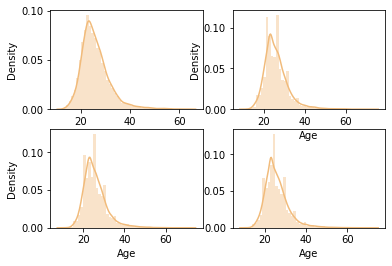

In [ ]:
#fazer histograma para distribuição de peso e altura entre os medalhistas
wes.set_palette('GrandBudapest1')
fig, axs = plt.subplots(2,2)
sns.distplot(df['Age'].dropna())
plt.subplot(2, 2, 1)
sns.distplot(df[df['Medal']=='Gold']['Age'].dropna())
plt.subplot(2, 2, 2)
sns.distplot(df[df['Medal']=='Silver']['Age'].dropna())
plt.subplot(2, 2, 3)
sns.distplot(df[df['Medal']=='Bronze']['Age'].dropna())
plt.subplot(2, 2, 1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

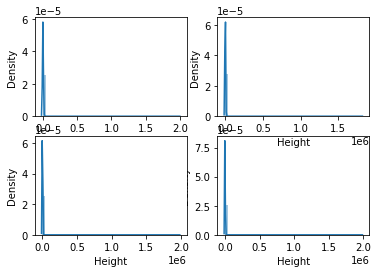

In [ ]:
#agora por altura
fig, axs = plt.subplots(2,2)
sns.distplot(df['Height'].dropna())
plt.subplot(2, 2, 1)
sns.distplot(df[df['Medal']=='Gold']['Height'].dropna())
plt.subplot(2, 2, 2)
sns.distplot(df[df['Medal']=='Silver']['Height'].dropna())
plt.subplot(2, 2, 3)
sns.distplot(df[df['Medal']=='Bronze']['Height'].dropna())
plt.subplot(2, 2, 1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

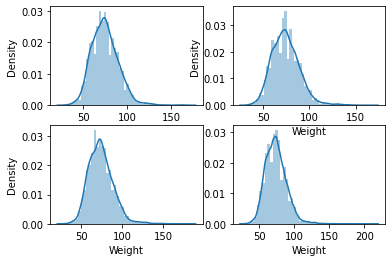

In [ ]:
#agora por peso
weight_drop1=df[df['Weight']=='hsuahusahu'].index #limpando peso
weight_drop2=df[df['Weight']=='773.333.333.333.333'].index #limpando peso
df.drop(weight_drop1, inplace=True)
df.drop(weight_drop2, inplace=True)
fig, axs = plt.subplots(2,2)
sns.distplot(df['Weight'].dropna())
plt.subplot(2, 2, 1)
sns.distplot(df[df['Medal']=='Gold']['Weight'].dropna())
plt.subplot(2, 2, 2)
sns.distplot(df[df['Medal']=='Silver']['Weight'].dropna())
plt.subplot(2, 2, 3)
sns.distplot(df[df['Medal']=='Bronze']['Weight'].dropna())
plt.subplot(2, 2, 1)
plt.show()

Podemos observar que as variáveis comportam-se de maneira muito similar independentemente da medalha ganha. Na média, a idade fica por volta de 23 anos e o peso por volta de 80kg, mas não influem diretamente na probabilidade de ganhar uma medalha específica. Voltaremos a isso depois, uma vez que como isso é uma média de todos os esportes, pode variar significativamente entre eles.

USA    5617
URS    2433
GBR    2254
GER    2189
FRA    1988
ITA    1783
SWE    1636
CAN    1491
AUS    1366
HUN    1199
RUS    1177
NED    1076
JPN    1071
NOR    1061
CHN     998
Name: NOC, dtype: int64


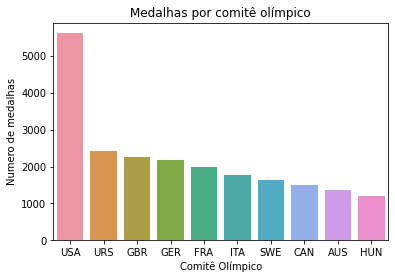

In [ ]:
#vendo os dados por comite olimpico
print (df['NOC'].value_counts().head(15)) #vendo quais sao os paises que mais ganharam medalhas
sns.countplot(x=df['NOC'], order=pd.value_counts(df['NOC']).iloc[:10].index) #observando países com mais medalhas
plt.xlabel("Comitê Olímpico")
plt.ylabel("Numero de medalhas")
plt.title('Medalhas por comitê olímpico')
plt.show()


Agora, observamos em ordem decrescente os 10 países que mais ganharam medalhas durante as olimpíadas. É possível perceber que esses são, também, as maiors potências econômicas e também os países mais ricos, o que provavelmente indica uma relação entre riqueza (e portanto capacidade de investimento nos esportes) e resultado nas olimpíadas.

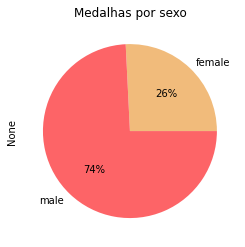

In [ ]:
#vendo os dados por sexo
df.groupby('Sex').size().plot(kind='pie', autopct='%1.0f%%')
plt.title('Medalhas por sexo')
plt.show()

Observando os dados por sexo, é possível perceber que existe uma grande influência dessa variável sobre o resultado de medalhas, o que indica uma grande desigualdade de gênero também nas olimpíadas.

Athletics     4590
Swimming      3210
Rowing        3007
Gymnastics    2681
Fencing       1873
Football      1657
Ice Hockey    1583
Hockey        1577
Cycling       1450
Shooting      1434
Name: Sport, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

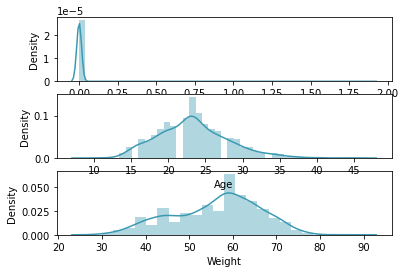

In [ ]:
#queremos agora as principais modalidades, para vermos como os variveis se comportam para elas
print (df['Sport'].value_counts().head(10))
wes.set_palette('Zissou1')
#vamos filtrar para ginástica olímpica
fig, axs = plt.subplots(3,1)
sns.distplot(df[df['Sport']=='Gymnastics']['Weight'].dropna())
plt.subplot(3,1,1)
sns.distplot(df[df['Sport']=='Gymnastics']['Height'].dropna())
plt.subplot(3,1,2)
sns.distplot(df[df['Sport']=='Gymnastics']['Age'].dropna())
plt.subplot(3,1,1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

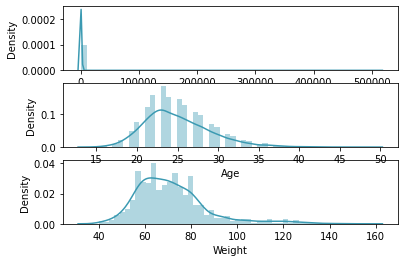

In [ ]:
#filtrando para atletismo
fig, axs = plt.subplots(3,1)
sns.distplot(df[df['Sport']=='Athletics']['Weight'].dropna())
plt.subplot(3,1,1)
sns.distplot(df[df['Sport']=='Athletics']['Height'].dropna())
plt.subplot(3,1,2)
sns.distplot(df[df['Sport']=='Athletics']['Age'].dropna())
plt.subplot(3,1,1)
plt.show()

Como já explicitado acima, a distribuição das variáveis peso, altura e idade pode variar largamente dependendo da modalidade. Dessa maneira, observamos aqui duas em específico: ginástica olímpica e atletismo. Dessa forma, podemos perceber que ainda que ambas concentrem atletas entre 20 e 25 anos, o peso médio para atletas de ginâstica artística fica em torno de 60kh, enquanto o mesmo para atletas do atletismo fica entre 60kg e 80kg.